<a href="https://colab.research.google.com/github/hansfriedhoff/fend/blob/gh-pages/HousingData_Statistics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Linear Regression for Predicting House Prices

## Preliminary Analysis

In [ ]:
# importing dependencies for your data analysis
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline
from patsy import dmatrices
import sklearn
import seaborn as sns

In [ ]:
df.info()

In [ ]:
# load data set onto notebock
df = pd.read_csv('/content/housing_data.csv')
df.shape

(1460, 81)

In [ ]:
## getting separate dataframes
df_cat = df.select_dtypes(include=[object])
df_cat.shape

(1460, 45)

In [ ]:
df_cat.columns

Index(['MSSubClass', 'MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour',
       'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1',
       'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl',
       'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond',
       'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
       'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical',
       'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType',
       'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC',
       'Fence', 'MiscFeature', 'MoSold', 'SaleType', 'SaleCondition'],
      dtype='object')

In [ ]:
df_cat['SaleCondition'].value_counts()

Normal     1198
Partial     125
Abnorml     101
Family       20
Alloca       12
AdjLand       4
Name: SaleCondition, dtype: int64

In [ ]:
## getting separate dataframes
df_num = df.select_dtypes(include=np.number)
df_num.shape

(1460, 36)

In [ ]:
pd.crosstab(df_cat['MSZoning'], df_cat['SaleCondition'], normalize='index')

SaleCondition,Abnorml,AdjLand,Alloca,Family,Normal,Partial
MSZoning,,,,,,
C (all),0.500000,0.000000,0.100000,0.000000,0.400000,0.000000
FV,0.061538,0.000000,0.000000,0.000000,0.600000,0.338462
RH,0.312500,0.000000,0.000000,0.000000,0.687500,0.000000
RL,0.060817,0.003475,0.007819,0.012163,0.829713,0.086012
RM,0.077982,0.000000,0.009174,0.027523,0.866972,0.018349


In [ ]:
pd.crosstab(df_cat['MSZoning'], df_cat['SaleCondition'], normalize='columns')

SaleCondition,Abnorml,AdjLand,Alloca,Family,Normal,Partial
MSZoning,,,,,,
C (all),0.049505,0.0,0.083333,0.0,0.003339,0.000
FV,0.039604,0.0,0.000000,0.0,0.032554,0.176
RH,0.049505,0.0,0.000000,0.0,0.009182,0.000
RL,0.693069,1.0,0.750000,0.7,0.797162,0.792
RM,0.168317,0.0,0.166667,0.3,0.157763,0.032


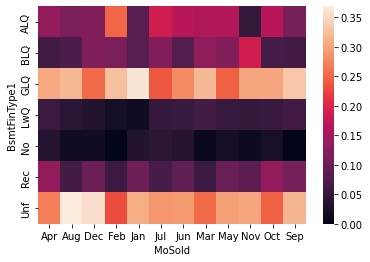

In [ ]:
sns.heatmap(pd.crosstab(df_cat['BsmtFinType1'], df_cat['MoSold'], normalize='columns'))

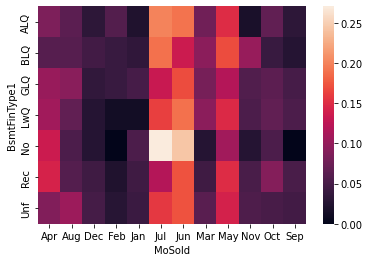

In [ ]:
sns.heatmap(pd.crosstab(df_cat['BsmtFinType1'], df_cat['MoSold'], normalize='index'))

In [ ]:
df_cat.nunique()

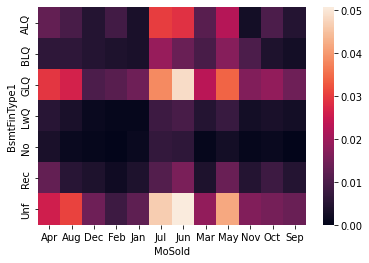

In [ ]:
sns.heatmap(pd.crosstab(df_cat['BsmtFinType1'],\
              df_cat['MoSold'], normalize='all'))

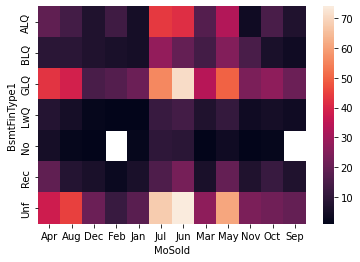

In [ ]:
sns.heatmap(df_cat[['BsmtFinType1','MoSold']].\
            value_counts().unstack())

In [ ]:
df_cat.corr()

,Pave,Grvl
Pave,1.0,-1.0
Grvl,-1.0,1.0


In [ ]:
df.isnull().sum().sort_values(ascending=False)

In [ ]:
df['GarageYrBlt'].isnull().sum()

0

In [ ]:
df = df.replace(np.nan, df.mean())

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


In [ ]:
df['GarageYrBlt'] = df['GarageYrBlt' ].replace(np.nan, df['GarageYrBlt'].mean())

In [ ]:
df_test= df.fillna(value=df['LotFrontage'].mean())
df_test.head(10)

,Unnamed: 0,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,0,SC60,RL,65.0,8450,Pave,None,Reg,Lvl,AllPub,...,0,No,No,No,0,Feb,2008,WD,Normal,208500
1,1,SC20,RL,80.0,9600,Pave,None,Reg,Lvl,AllPub,...,0,No,No,No,0,May,2007,WD,Normal,181500
2,2,SC60,RL,68.0,11250,Pave,None,IR1,Lvl,AllPub,...,0,No,No,No,0,Sep,2008,WD,Normal,223500
3,3,SC70,RL,60.0,9550,Pave,None,IR1,Lvl,AllPub,...,0,No,No,No,0,Feb,2006,WD,Abnorml,140000
4,4,SC60,RL,84.0,14260,Pave,None,IR1,Lvl,AllPub,...,0,No,No,No,0,Dec,2008,WD,Normal,250000
5,5,SC50,RL,85.0,14115,Pave,None,IR1,Lvl,AllPub,...,0,No,MnPrv,Shed,700,Oct,2009,WD,Normal,143000
6,6,SC20,RL,75.0,10084,Pave,None,Reg,Lvl,AllPub,...,0,No,No,No,0,Aug,2007,WD,Normal,307000
7,7,SC60,RL,0.0,10382,Pave,None,IR1,Lvl,AllPub,...,0,No,No,Shed,350,Nov,2009,WD,Normal,200000
8,8,SC50,RM,51.0,6120,Pave,None,Reg,Lvl,AllPub,...,0,No,No,No,0,Apr,2008,WD,Abnorml,129900
9,9,SC190,RL,50.0,7420,Pave,None,Reg,Lvl,AllPub,...,0,No,No,No,0,Jan,2008,WD,Normal,118000


In [ ]:
df['Fence'].value_counts()

No       1179
MnPrv     157
GdPrv      59
GdWo       54
MnWw       11
Name: Fence, dtype: int64

In [ ]:
df_test2 = df.fillna({'Alley':'No Alley'})
df_test2.head(10)

,Unnamed: 0,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,0,SC60,RL,65.0,8450,Pave,None,Reg,Lvl,AllPub,...,0,No,No,No,0,Feb,2008,WD,Normal,208500
1,1,SC20,RL,80.0,9600,Pave,None,Reg,Lvl,AllPub,...,0,No,No,No,0,May,2007,WD,Normal,181500
2,2,SC60,RL,68.0,11250,Pave,None,IR1,Lvl,AllPub,...,0,No,No,No,0,Sep,2008,WD,Normal,223500
3,3,SC70,RL,60.0,9550,Pave,None,IR1,Lvl,AllPub,...,0,No,No,No,0,Feb,2006,WD,Abnorml,140000
4,4,SC60,RL,84.0,14260,Pave,None,IR1,Lvl,AllPub,...,0,No,No,No,0,Dec,2008,WD,Normal,250000
5,5,SC50,RL,85.0,14115,Pave,None,IR1,Lvl,AllPub,...,0,No,MnPrv,Shed,700,Oct,2009,WD,Normal,143000
6,6,SC20,RL,75.0,10084,Pave,None,Reg,Lvl,AllPub,...,0,No,No,No,0,Aug,2007,WD,Normal,307000
7,7,SC60,RL,0.0,10382,Pave,None,IR1,Lvl,AllPub,...,0,No,No,Shed,350,Nov,2009,WD,Normal,200000
8,8,SC50,RM,51.0,6120,Pave,None,Reg,Lvl,AllPub,...,0,No,No,No,0,Apr,2008,WD,Abnorml,129900
9,9,SC190,RL,50.0,7420,Pave,None,Reg,Lvl,AllPub,...,0,No,No,No,0,Jan,2008,WD,Normal,118000


In [ ]:
df_test['LotFrontage'].isnull().sum()

0

In [ ]:
## to increase the number of rows that are output
pd.set_option('display.max_rows', None)

In [ ]:
## basic info about the columns
df.info()

# 2. Dealing With Missing Values

## - dealing with missing values depends on
- the data type for the column
- extent of missingness (<10% can delete rows)
- missingness correlated the target? or correlated with other variables

## - methods for dealing with missing values
- drop rows with missing columns; df.dropna()
- fill in zeros; df.fillna(0)
- drop columns with missing values; df = df[df.col1 != 0]; df.drop(df.loc[df['col1']==0].index, inplace=True)
- imputation of the mean, median (depending on the distribution); df['col1'] = df['col].fillna(df['col11'].mean()]
- impute mode (categorical); df['col1'] = df['col].fillna(df['col11'].mode()]

## - using SimpleImputer
- mean_imput_inst = SimpleImputer(missing_values=np.nan, strategy='mean')
- mean_imput_obj = mean_imput.fit(df)
- df_mean_imput = mean_imput_obj.transform(df.values)

## - visualizing missingness

In [ ]:
## check for missing values
missing_counts = df.isna().sum().sort_values(ascending=False)
round(missing_counts*100./len(df),1)

In [ ]:
# generate a bar chart of missingness
msno.bar(df_num)
plt.show()

In [ ]:
# generate a matrix of missing values
msno.matrix(df_num)
plt.show()

## Addressing missingness

In [ ]:
# filling with the value ahead of the missing space in the column
df['GarageYrBlt'].fillna(method='ffill',inplace=True)

In [ ]:
## check level of missingness
df.isnull().sum()

In [ ]:
## drop id column
df.drop('Unnamed: 0', axis=1, inplace=True)

In [ ]:
## creating a dataframe of only numerical variables
df_num = df.select_dtypes(include=['int64', 'float64'])
df_num.shape

# 3. Dealing with categorical Variables

## methods for dealing with categorical variables
- onehotencoding; ohe_df = pd.DataFrame(ohe.fit_transform(df_cat)
- df['col_enc'] = LabelEncoder().fit_transform(df_cat['col'])
- creating dummy variables; pd.get_dummies(df_cat)
- using frequency count; df['cat_col'].value_counts()
- df.fillna(method='ffill',inplace=True)
    
- df_cat['cat_col'] = df['cat_col'].cat.codes

In [ ]:
## creating a dataframe of only categorical variables
df_cat = df.select_dtypes(include=['object'])
df_cat.shape

In [ ]:
## list of categorical variables
df_cat.columns

In [ ]:
## check for missing values
df_cat.isnull().sum()

In [ ]:
## the frequency of the categories in the column
df_cat['Electrical'].value_counts(dropna=False)

### ***one row of this 'Electrical' column has a missing value ('NaN')***

In [ ]:
## test dataframe to illustrate the use of value_counts to fill the missing values based on the frequency of NaNs
df_test = pd.DataFrame(data=[[34, 'null', 'mark'], [22, 'null', 'mark'], [34, 'null', 'mark']], columns=["id", 'temp', 'name'],index=[1, 2, 3])
result2 = df_test.apply(pd.value_counts).fillna(0).astype(int)
result2

## 4. distribution in the target variable

In [ ]:
df_num.SalePrice.describe()

In [ ]:
plt.figure(figsize=(10, 7))
df_num.SalePrice.plot(kind='hist', bins=40)
plt.show()

In [ ]:
plt.figure(figsize=(10, 15))
plt.boxplot(df_num.SalePrice)
plt.show()

In [ ]:
## transform the target variable to make its distribution more normal
df_num['log_SP'] = np.log(df_num['SalePrice'])

In [ ]:
plt.figure(figsize=(10, 7))
df_num['log_SP'].plot(kind='hist', bins=40)
plt.show()

In [ ]:
## output the absolue value of correlation coefficient in descending order
np.abs(df_num.corr()['log_SP']).sort_values(ascending=False)

## Basic Assumptions of a Linear Regression
 L I N E
- linear relationship between the variables and the target
- independence of the variables (little to no correlation)
- target/Outcome is continuous % normally distributed
- errors are constant (homoscedasticity)

 <font size="10">**Linear Regression Model**</font>

# 1. import the algorithms and dependencies

In [ ]:
# import LinearRegression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# 2. split our data target values and features

In [ ]:
df_num = df_num.dropna()

In [ ]:
# split the data set into features and target
X = df_num.drop(['log_SP'], axis=1)
y = df_num['log_SP'].values.reshape(-1,1)

In [ ]:
y.shape

# 3. split training and testing data sets

In [ ]:
## split dataset using the 'train_test_split' function
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=0)

In [ ]:
## visualize the matrices
X_train.shape,X_test.shape,y_train.shape,y_test.shape

# 4. create an instance of the model 

In [ ]:
# create a linear regression base formula
model = LinearRegression()
model

# 5. Chose the principal features

In [ ]:
# create an instance of the pca and define the no. of components 
pca = PCA(n_components=5)

# 6. scale the features before PCA transformation

In [ ]:
## create an instance of the standard scalar
sc = StandardScaler()

In [ ]:
## use standard scalar to get scale forumla
sc = sc.fit(X_train)

![image.png](attachment:8d9eddf9-c44b-4263-a9ee-059b756d0192.png)

In [ ]:
## use scale equation to transform the X_train dataset
X_train_sc = sc.transform(X_train)

In [ ]:
X_train

In [ ]:
## view scaled data
X_train_sc

In [ ]:
## view the y_train values
y_train

In [ ]:
## use PCA to filter X_train dataset
X_train_pca = pca.fit_transform(X_train_sc)
X_train_pca

In [ ]:
## fit the model using the filtered data X_train
model.fit(X_train_pca, y_train)

In [ ]:
## print out the r-squared value for the model from the train dataset
model.score(X_train_pca, y_train)

In [ ]:
## the coefficient of the principal components (b_1, b_2, b_3,...)
model.coef_

In [ ]:
## get the intercept of the model (b_0)
model.intercept_

In [ ]:
## get feature columns
feature_cols = X_train.columns
feature_cols

In [ ]:
## creating a dataframe the combines the coefficeints of the PCs with the features in the model
pca_feat = pd.DataFrame(pca.components_,columns=X_train.columns,index = ['PC-1','PC-2','PC-3','PC-4','PC-5'])
pca_feat

## Using Test Dataset

In [ ]:
## creating second instance of the scaler
sc1  = StandardScaler()

In [ ]:
## fit the scaler on test data
sc1 = sc1.fit(X_test)

In [ ]:
## use standard scalar to transform the test data 
X_test_sc = sc.transform(X_test)

In [ ]:
## use PCA to transform the X_test dataset
X_test_pca = pca.fit_transform(X_test_sc)

In [ ]:
## use the results of the model to compare with the actual values
model.score(X_test_pca, y_test)

# Various Metrics For Linear Regression

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [ ]:
## generate the predicted values using the test data
y_hat_test = model.predict(X_test_pca)

In [ ]:
## generate predicted values using the train data set
y_hat_train = model.predict(X_train_pca)

In [ ]:
print('R_squared Score:', model.score(X_train_pca, y_train))
print('Mean Absolute Error:', mean_absolute_error(y_test, y_hat_test))

In [ ]:

print('Root Mean Squared Error test:', np.sqrt(mean_squared_error(y_test, y_hat)))
print('Root Mean Squared Error train:', np.sqrt(mean_squared_error(y_train, y_hat_train)))


In [ ]:
#Compare predicted and actual values
print('Mean Predicted Selling Price:', y_hat.mean())
print('Mean Selling Price:', y_test.mean())

In [ ]:
print('Mean predicted Selling Price:', np.exp(12.05143422997597))
print('Mean Selling Price:', np.exp(12.06699189871778))

# Stats Model

In [ ]:
import statsmodels.api as sm
from patsy import dmatrices

In [ ]:
y, x = dmatrices('log_SP ~ LotFrontage + OverallQual + OverallCond + YearBuilt +\
                LowQualFinSF + BsmtFullBath + BsmtHalfBath',
                  df_num, return_type="dataframe")
x.shape, y.shape

In [ ]:
## converting the 2-dimensional y matrix to a 1-dimensional
y = np.ravel(y)
y.shape

In [ ]:
## creating an instance of the standard scaler
sc2 = StandardScaler()

In [ ]:
## using the standard scaler to transform/scale the values of the features
x_sc = sc2.fit_transform(x)

In [ ]:
## adding the constant to the values (not assuming a line passing thru the (0,0))
x = sm.add_constant(x_sc)

In [ ]:
## fit the model with the x-train and y
model2 = sm.OLS(y, x).fit()

In [ ]:
print_model = model2.summary()
print(print_model)

In [ ]:
## generating predicted values from the model
predictions = model2.predict(x)
predictions

# Inclding Categorical Variables

In [ ]:
# select only the numerical values
df_cat = df.select_dtypes(include=['object'])
df_cat.shape

(1460, 45)

In [ ]:
df_cat['log_SP'] = np.log(df['SalePrice'])

In [ ]:
cat_col = df_cat.columns
cat_col

Index(['MSSubClass', 'MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour',
       'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1',
       'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl',
       'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond',
       'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
       'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical',
       'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType',
       'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC',
       'Fence', 'MiscFeature', 'MoSold', 'SaleType', 'SaleCondition'],
      dtype='object')

In [ ]:
## grouping the target by the categories of a categorical variable
df_cat.groupby('Heating').mean()

In [ ]:
## generate boxplot for single categorical variable relative to a continuous (target varibale, indicator vriable)
df_cat.boxplot('log_SP', by='Heating')
plt.show()

In [ ]:
mod = ols('log_SP ~ LotConfig',data=df_cat).fit()
aov_table = sm.stats.anova_lm(mod, typ=2)
print(aov_table)

In [ ]:
pair_t = mod.t_test_pairwise('LotConfig')
pair_t.result_frame

In [ ]:
## generate a list of the categories 
grps = pd.unique(df_cat['LotConfig'].values)
grps

In [ ]:
## generate a dictionary that matches the distribution of target values within each category
d_data = {grp:df_cat['log_SP'][df_cat['LotConfig'] == grp] for grp in grps}
## convert the dictionary to a dataframe
d_data = pd.DataFrame(d_data)
## basic statistics of the dataframe gives a representation of the distribution
d_data.describe()

In [ ]:
from scipy import stats

In [ ]:
## get the names of the categories
df_cat['Heating'].unique()

In [ ]:
## use the names to create a separate series for each cageteogry
gasA = df_cat[df_cat['Heating'] == 'GasA']['log_SP']
gasW = df_cat[df_cat['Heating'] == 'GasW']['log_SP']
grav = df_cat[df_cat['Heating'] == 'Grav']['log_SP']
wall = df_cat[df_cat['Heating'] == 'Wall']['log_SP']
gasA

In [ ]:
## use the series to conduct a t-test (2) or Anova (>2) to test the 
stats.ttest_ind(gasA , gasW)

In [ ]:
## using the values in the categorical columns to use in ANOVA
k = len(pd.unique(df_cat.LotConfig))  # number of conditions
N = len(df_cat.values)  # conditions times participants
n = df_cat.groupby('LotConfig').size()[0] #Participants in each condition

In [ ]:
## list the names of the columns
cat_col=df_cat.columns

In [ ]:
## use a for loop to iterate over the variables generate a simple regression model with the target variable and conduct an ANOVA on the result
for x in cat_col:
    model = ols('log_SP' + '~' + x, data = df_cat).fit() #oridnary least square / OLS method
    result_anova = sm.stats.anova_lm(model) # ANOVA Test
    print(result_anova)
    print('-----')

In [ ]:
for i in cat_col:
    plt.figure()
    sns.boxplot(data=df_num, x=df_cat['log_SP'], y=df_cat[i])

In [ ]:
# get ANOVA table output similar to the regression model
import statsmodels.api as sm
from statsmodels.formula.api import ols

# Ordinary Least Squares (OLS) model
model = ols('log_SP ~ C(Alley)', data=df_cat).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
anova_table

# Using Z-score to find outliers

In [ ]:
from scipy.stats import zscore

## (1) z-score filter

In [ ]:
## another way to filter out all the categorical variables
df_num = df_num.astype(np.number)

In [ ]:
## use a lambda function to find the z_score for all the columns
df_Z = df_num.apply(lambda x: x if np.std(x) == 0 else zscore(x))
df_Z

## (2) use the df.describe() function

In [ ]:
## use the describe() function to get the 1st and 3rd quartile of the all the variables
df_num .describe().loc[['25%', '75%']]

## (3) directly apply the zscore to column

In [ ]:
## groupby a categorical column and find the z-score for each category
df.groupby('OverallQual').SalePrice.transform(zscore)

In [ ]:
## find the zscore
z_scores = df_num.apply(stats.zscore)
z_scores

In [ ]:
## use the z-score to filter out the outliers
abs_z_scores = np.abs(z_scores) 
filtered_entries = (abs_z_scores < 5).all(axis=1)  
train_df= df_num[filtered_entries] 
train_df

## (4) using the interquartile range

In [ ]:
from scipy.stats import iqr

In [ ]:
iqr(df_num['SalePrice'])

In [ ]:
df_num.head()

In [ ]:
z_scores = df_num.apply(stats.zscore)
df_new = df_num[(z_scores>-3) & (z_scores <3)]
df_new